# Web Scraping and Cleaning

In [71]:
!python -m pip install adjustText


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
URL = "https://stats.espncricinfo.com/ci/engine/records/batting/most_runs_career.html?id=117;type=trophy"
r = requests.get(URL)
soup = BeautifulSoup(r.text, "html.parser")

ta = soup.find_all('tr', {'class':"data2" })
for i in ta:
  print(i.text)


V Kohli
2008-2022
223
215
32
6624
113
36.19
5129
129.14
5
44
9
578
218


S Dhawan
2008-2022
206
205
27
6244
106*
35.07
4942
126.34
2
47
10
701
136


DA Warner
2009-2022
162
162
22
5881
126
42.00
4180
140.69
4
55
9
577
216


RG Sharma
2008-2022
227
222
28
5879
109*
30.30
4526
129.89
1
40
14
519
240


SK Raina
2008-2021
205
200
30
5528
100*
32.51
4043
136.73
1
39
8
506
203


AB de Villiers
2008-2021
184
170
40
5162
133*
39.70
3403
151.68
3
40
10
413
251


MS Dhoni
2008-2022
234
206
79
4978
84*
39.19
3682
135.19
0
24
4
346
229


CH Gayle
2009-2021
142
141
16
4965
175*
39.72
3333
148.96
6
31
8
404
357


RV Uthappa
2008-2022
205
197
17
4952
88
27.51
3799
130.35
0
27
8
481
182


KD Karthik
2008-2022
229
208
45
4376
97*
26.84
3299
132.64
0
20
13
426
134


G Gambhir
2008-2018
154
152
16
4217
93
31.00
3404
123.88
0
36
12
492
59


AT Rayudu
2010-2022
188
175
31
4190
100*
29.09
3296
127.12
1
22
13
349
164


AM Rahane
2008-2022
158
148
16
4074
105*
30.86
3376
120.67
2
28
13
431
80


KL Rahul
2013

In [73]:
table = soup.find_all('table')
df_bat = pd.read_html(str(table))[0]
df_bat

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,2008-2022,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218
1,(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore)
2,S Dhawan,2008-2022,206,205,27,6244,106*,35.07,4942,126.34,2,47,10,701,136
3,"(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede...","(Deccan Chargers, Delhi Capitals, Delhi Darede..."
4,DA Warner,2009-2022,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)","(Chennai Super Kings, Mumbai Indians)"
96,HH Pandya,2015-2022,107,100,35,1963,91,30.20,1330,147.59,0,8,5,146,110
97,"(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)","(Gujarat Titans, Mumbai Indians)"
98,Shubman Gill,2018-2022,74,71,12,1900,96,32.20,1517,125.24,0,14,3,188,47


In [74]:
df1_bat=df_bat.iloc[::2]
df1_bat.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,2008-2022,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218
2,S Dhawan,2008-2022,206,205,27,6244,106*,35.07,4942,126.34,2,47,10,701,136
4,DA Warner,2009-2022,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216
6,RG Sharma,2008-2022,227,222,28,5879,109*,30.30,4526,129.89,1,40,14,519,240
8,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203


In [75]:
df2_bat=df1_bat.reset_index(drop=True)

In [76]:
df2_bat

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,2008-2022,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218
1,S Dhawan,2008-2022,206,205,27,6244,106*,35.07,4942,126.34,2,47,10,701,136
2,DA Warner,2009-2022,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216
3,RG Sharma,2008-2022,227,222,28,5879,109*,30.30,4526,129.89,1,40,14,519,240
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
5,AB de Villiers,2008-2021,184,170,40,5162,133*,39.70,3403,151.68,3,40,10,413,251
6,MS Dhoni,2008-2022,234,206,79,4978,84*,39.19,3682,135.19,0,24,4,346,229
7,CH Gayle,2009-2021,142,141,16,4965,175*,39.72,3333,148.96,6,31,8,404,357
8,RV Uthappa,2008-2022,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182
9,KD Karthik,2008-2022,229,208,45,4376,97*,26.84,3299,132.64,0,20,13,426,134


In [77]:
df2_bat.dtypes

Player    object
Span      object
Mat       object
Inns      object
NO        object
Runs      object
HS        object
Ave       object
BF        object
SR        object
100       object
50        object
0         object
4s        object
6s        object
dtype: object

In [78]:
df2_bat['HS']=df2_bat['HS'].astype(str)
df2_bat['HS']=df2_bat['HS'].str.replace("*","").astype(int)
df2_bat

<ipython-input-78-0cd62934494e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2_bat['HS']=df2_bat['HS'].str.replace("*","").astype(int)


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,2008-2022,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218
1,S Dhawan,2008-2022,206,205,27,6244,106,35.07,4942,126.34,2,47,10,701,136
2,DA Warner,2009-2022,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216
3,RG Sharma,2008-2022,227,222,28,5879,109,30.30,4526,129.89,1,40,14,519,240
4,SK Raina,2008-2021,205,200,30,5528,100,32.51,4043,136.73,1,39,8,506,203
5,AB de Villiers,2008-2021,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251
6,MS Dhoni,2008-2022,234,206,79,4978,84,39.19,3682,135.19,0,24,4,346,229
7,CH Gayle,2009-2021,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357
8,RV Uthappa,2008-2022,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182
9,KD Karthik,2008-2022,229,208,45,4376,97,26.84,3299,132.64,0,20,13,426,134


In [79]:
span=df2_bat["Span"].str.split("-", expand = True)
a=span[0].astype(int)
b=span[1].astype(int)
years=b-a
years


0     14
1     14
2     13
3     14
4     13
5     13
6     14
7     12
8     14
9     14
10    10
11    12
12    14
13     9
14    12
15    14
16     9
17    12
18    10
19    11
20    10
21    11
22     6
23     6
24     7
25     9
26    11
27     7
28    10
29    11
30    14
31     9
32     9
33    10
34     6
35    14
36     9
37     5
38    11
39    10
40     6
41     5
42     7
43    12
44     5
45    10
46     9
47     7
48     7
49     4
dtype: int64

In [80]:
Four=df2_bat["4s"]
Six=df2_bat["6s"]
f=Four.astype(int)
s=Six.astype(int)
bound=f+s
bound


0     796
1     837
2     793
3     759
4     709
5     664
6     575
7     761
8     663
9     560
10    551
11    513
12    511
13    491
14    565
15    423
16    437
17    441
18    423
19    420
20    423
21    414
22    389
23    412
24    336
25    383
26    366
27    440
28    368
29    338
30    272
31    285
32    344
33    282
34    299
35    307
36    362
37    324
38    317
39    324
40    301
41    296
42    245
43    292
44    331
45    312
46    205
47    250
48    256
49    235
dtype: int64

In [81]:
df2_bat.insert(loc=2,column='Years Played',value=years)
df2_bat.insert(loc=16,column='Boundaries',value=bound)
df2_bat

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
0,V Kohli,2008-2022,14,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218,796
1,S Dhawan,2008-2022,14,206,205,27,6244,106,35.07,4942,126.34,2,47,10,701,136,837
2,DA Warner,2009-2022,13,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216,793
3,RG Sharma,2008-2022,14,227,222,28,5879,109,30.30,4526,129.89,1,40,14,519,240,759
4,SK Raina,2008-2021,13,205,200,30,5528,100,32.51,4043,136.73,1,39,8,506,203,709
5,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664
6,MS Dhoni,2008-2022,14,234,206,79,4978,84,39.19,3682,135.19,0,24,4,346,229,575
7,CH Gayle,2009-2021,12,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,761
8,RV Uthappa,2008-2022,14,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182,663
9,KD Karthik,2008-2022,14,229,208,45,4376,97,26.84,3299,132.64,0,20,13,426,134,560


In [82]:
convert_dict = {
                'Player': str,
                'Span': str,
                'Years Played': int,
                'Mat': int,
                'Inns': int,
                'NO': int,
                'Runs':int,
                'HS':int,
                'Ave':float,
                'BF':int,
                'SR':float,
                '0':int,
                '4s':int,
                '6s':int,
                '100':int,
                '50':int
                }
df2_bat = df2_bat.astype(convert_dict)
print(df2_bat.dtypes)

Player           object
Span             object
Years Played      int64
Mat               int64
Inns              int64
NO                int64
Runs              int64
HS                int64
Ave             float64
BF                int64
SR              float64
100               int64
50                int64
0                 int64
4s                int64
6s                int64
Boundaries        int64
dtype: object


In [83]:
URL = "https://stats.espncricinfo.com/ci/engine/records/bowling/most_wickets_career.html?id=117;type=trophy"
r = requests.get(URL)
soup = BeautifulSoup(r.text, "html.parser")

table = soup.find_all('table')
df_bowl = pd.read_html(str(table))[0]
df_bowl

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,DJ Bravo,2008-2022,161,158,519.5,3,4360,183,4/22,23.82,8.38,17.0,2,0
1,"(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In...","(Chennai Super Kings, Gujarat Lions, Mumbai In..."
2,SL Malinga,2009-2019,122,122,471.1,8,3365,170,5/13,19.79,7.14,16.6,6,1
3,(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians),(Mumbai Indians)
4,YS Chahal,2013-2022,131,130,476.0,4,3624,166,5/40,21.83,7.61,17.2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang...","(Kolkata Knight Riders, Royal Challengers Bang..."
92,M Muralidaran,2008-2014,66,66,254.0,1,1696,63,3/11,26.92,6.67,24.1,0,0
93,"(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro...","(Chennai Super Kings, Kochi Tuskers Kerala, Ro..."
94,Shakib Al Hasan,2011-2021,71,70,247.2,1,1839,63,3/17,29.19,7.43,23.5,0,0


In [84]:
df1_bowl=df_bowl.iloc[::2]

In [85]:
df2_bowl=df1_bowl.reset_index(drop=True)

In [86]:
df2_bowl

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,DJ Bravo,2008-2022,161,158,519.5,3,4360,183,4/22,23.82,8.38,17.0,2,0
1,SL Malinga,2009-2019,122,122,471.1,8,3365,170,5/13,19.79,7.14,16.6,6,1
2,YS Chahal,2013-2022,131,130,476.0,4,3624,166,5/40,21.83,7.61,17.2,3,1
3,A Mishra,2008-2021,154,154,540.5,6,3976,166,5/17,23.95,7.35,19.5,4,1
4,PP Chawla,2008-2021,165,164,545.4,2,4301,157,4/17,27.39,7.88,20.8,2,0
5,R Ashwin,2009-2022,184,181,650.0,4,4534,157,4/34,28.87,6.97,24.8,1,0
6,B Kumar,2011-2022,146,146,543.4,11,3971,154,5/19,25.78,7.30,21.1,2,1
7,SP Narine,2012-2022,148,147,576.1,3,3820,152,5/19,25.13,6.63,22.7,7,1
8,Harbhajan Singh,2008-2021,163,160,569.2,6,4030,150,5/18,26.86,7.07,22.7,1,1
9,JJ Bumrah,2013-2022,120,120,457.0,8,3379,145,5/10,23.30,7.39,18.9,2,1


In [87]:
df2_bowl.dtypes

Player    object
Span      object
Mat       object
Inns      object
Overs     object
Mdns      object
Runs      object
Wkts      object
BBI       object
Ave       object
Econ      object
SR        object
4         object
5         object
dtype: object

In [88]:
span=df2_bowl["Span"].str.split("-", expand = True)
a=span[0].astype(int)
b=span[1].astype(int)
years=b-a
years


0     14
1     10
2      9
3     13
4     13
5     13
6     11
7     10
8     13
9      9
10    12
11    14
12     9
13     5
14     9
15    10
16     9
17     8
18     5
19     9
20    10
21    12
22     8
23     7
24     7
25    12
26    12
27     8
28     9
29    10
30     7
31    13
32     8
33     7
34     7
35     9
36     7
37     6
38     9
39    13
40     4
41     9
42     9
43    12
44     5
45     6
46     6
47    10
dtype: int64

In [89]:
df2_bowl.insert(loc=2,column='Years Played',value=years)
df2_bowl

,Player,Span,Years Played,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,DJ Bravo,2008-2022,14,161,158,519.5,3,4360,183,4/22,23.82,8.38,17.0,2,0
1,SL Malinga,2009-2019,10,122,122,471.1,8,3365,170,5/13,19.79,7.14,16.6,6,1
2,YS Chahal,2013-2022,9,131,130,476.0,4,3624,166,5/40,21.83,7.61,17.2,3,1
3,A Mishra,2008-2021,13,154,154,540.5,6,3976,166,5/17,23.95,7.35,19.5,4,1
4,PP Chawla,2008-2021,13,165,164,545.4,2,4301,157,4/17,27.39,7.88,20.8,2,0
5,R Ashwin,2009-2022,13,184,181,650.0,4,4534,157,4/34,28.87,6.97,24.8,1,0
6,B Kumar,2011-2022,11,146,146,543.4,11,3971,154,5/19,25.78,7.30,21.1,2,1
7,SP Narine,2012-2022,10,148,147,576.1,3,3820,152,5/19,25.13,6.63,22.7,7,1
8,Harbhajan Singh,2008-2021,13,163,160,569.2,6,4030,150,5/18,26.86,7.07,22.7,1,1
9,JJ Bumrah,2013-2022,9,120,120,457.0,8,3379,145,5/10,23.30,7.39,18.9,2,1


In [90]:
convert_dict = {
                'Player': str,
                'Span': str,
                'Years Played':int,
                'Mat': int,
                'Inns': int,
                'Overs': float,
                'Runs':int,
                'Wkts':int,
                'Ave':float,
                'Econ':float,
                'SR':float,
                '4':int,
                '5':int
                }
df2_bowl = df2_bowl.astype(convert_dict)
print(df2_bowl.dtypes)


Player           object
Span             object
Years Played      int64
Mat               int64
Inns              int64
Overs           float64
Mdns             object
Runs              int64
Wkts              int64
BBI              object
Ave             float64
Econ            float64
SR              float64
4                 int64
5                 int64
dtype: object


In [91]:
URL = "https://stats.espncricinfo.com/ci/engine/records/keeping/most_dismissals_career.html?id=117;type=trophy"
r = requests.get(URL)
soup = BeautifulSoup(r.text, "html.parser")

table = soup.find_all('table')
df_wk = pd.read_html(str(table))[0]
df_wk

,Player,Span,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,MS Dhoni,2008-2022,234,227,170,131,39,4 (4ct 0st),0.748
1,"(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ...","(Chennai Super Kings, Rising Pune Supergiant, ..."
2,KD Karthik,2008-2022,229,212,159,125,34,4 (4ct 0st),0.750
3,"(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun...","(Delhi Daredevils, Gujarat Lions, Kings XI Pun..."
4,WP Saha,2008-2022,144,123,95,73,22,4 (4ct 0st),0.772
...,...,...,...,...,...,...,...,...,...
91,(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore),(Royal Challengers Bangalore)
92,U Kaul,2008-2008,5,5,2,2,0,2 (2ct 0st),0.400
93,(Kings XI Punjab),(Kings XI Punjab),(Kings XI Punjab),(Kings XI Punjab),(Kings XI Punjab),(Kings XI Punjab),(Kings XI Punjab),(Kings XI Punjab),(Kings XI Punjab)
94,Prabhsimran Singh,2019-2022,6,5,2,2,0,1 (1ct 0st),0.400


In [92]:
df1_wk=df_wk.iloc[::2]

In [93]:
df2_wk=df1_wk.reset_index(drop=True)

In [94]:
df2_wk

,Player,Span,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,MS Dhoni,2008-2022,234,227,170,131,39,4 (4ct 0st),0.748
1,KD Karthik,2008-2022,229,212,159,125,34,4 (4ct 0st),0.750
2,WP Saha,2008-2022,144,123,95,73,22,4 (4ct 0st),0.772
3,RV Uthappa,2008-2022,205,114,90,58,32,4 (2ct 2st),0.789
4,PA Patel,2008-2019,139,122,81,65,16,4 (4ct 0st),0.663
5,RR Pant,2016-2022,98,88,79,61,18,3 (3ct 0st),0.897
6,Q de Kock,2013-2022,92,85,77,62,15,4 (4ct 0st),0.905
7,NV Ojha,2009-2018,113,111,75,65,10,4 (4ct 0st),0.675
8,AC Gilchrist,2008-2013,80,80,67,51,16,4 (4ct 0st),0.837
9,SV Samson,2013-2022,138,79,62,50,12,4 (2ct 2st),0.784


In [95]:
df2_wk.dtypes

Player          object
Span            object
Mat             object
Inns            object
Dis             object
Ct              object
St              object
Max Dis Inns    object
Dis/Inn         object
dtype: object

In [96]:
span=df2_wk["Span"].str.split("-", expand = True)
a=span[0].astype(int)
b=span[1].astype(int)
years=b-a
years


0     14
1     14
2     14
3     14
4     11
5      6
6      9
7      9
8      5
9      9
10     9
11     5
12    13
13     6
14     3
15    12
16    11
17     5
18     6
19     5
20    10
21     3
22     3
23     6
24    12
25     3
26     0
27     0
28     3
29     3
30     0
31     5
32     6
33     0
34    11
35     2
36     7
37     1
38     1
39     1
40     1
41     0
42     4
43     0
44     0
45     0
46     0
47     3
dtype: int64

In [97]:
df2_wk.insert(loc=2,column='Years Played',value=years)
df2_wk.head()

,Player,Span,Years Played,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,MS Dhoni,2008-2022,14,234,227,170,131,39,4 (4ct 0st),0.748
1,KD Karthik,2008-2022,14,229,212,159,125,34,4 (4ct 0st),0.750
2,WP Saha,2008-2022,14,144,123,95,73,22,4 (4ct 0st),0.772
3,RV Uthappa,2008-2022,14,205,114,90,58,32,4 (2ct 2st),0.789
4,PA Patel,2008-2019,11,139,122,81,65,16,4 (4ct 0st),0.663


In [98]:
convert_dict = {
                'Player': str,
                'Span': str,
                'Mat': int,
                'Inns': int,
                'Dis': int,
                'Ct':int,
                'St':int,
                'Dis/Inn':float
                }
df2_wk = df2_wk.astype(convert_dict)
print(df2_wk.dtypes)

Player           object
Span             object
Years Played      int64
Mat               int64
Inns              int64
Dis               int64
Ct                int64
St                int64
Max Dis Inns     object
Dis/Inn         float64
dtype: object


# Data Analysis

In [99]:
Ave=df2_bat.nlargest(10, ['Ave'])
Ave

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
13,KL Rahul,2013-2022,9,109,100,19,3889,132,48.01,2855,136.21,4,31,4,327,164,491
2,DA Warner,2009-2022,13,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216,793
32,SE Marsh,2008-2017,9,71,69,7,2477,115,39.95,1866,132.74,1,20,1,266,78,344
23,JC Buttler,2016-2022,6,82,81,10,2831,124,39.87,1891,149.70,5,15,1,277,135,412
46,JP Duminy,2009-2018,9,83,77,26,2029,78,39.78,1636,124.02,0,14,1,126,79,205
7,CH Gayle,2009-2021,12,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,761
5,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664
6,MS Dhoni,2008-2022,14,234,206,79,4978,84,39.19,3682,135.19,0,24,4,346,229,575
47,MEK Hussey,2008-2015,7,59,58,7,1977,116,38.76,1612,122.64,1,15,1,198,52,250
33,DA Miller,2012-2022,10,105,102,35,2455,101,36.64,1783,137.68,1,12,3,169,113,282


In [100]:
sr=df2_bat.nlargest(10, ['SR'])
sr

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
45,AD Russell,2012-2022,10,98,82,15,2035,88,30.37,1144,177.88,0,10,4,137,175,312
27,V Sehwag,2008-2015,7,104,104,5,2728,122,27.55,1755,155.44,2,16,7,334,106,440
39,GJ Maxwell,2012-2022,10,110,106,15,2319,95,25.48,1507,153.88,0,13,12,197,127,324
5,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664
23,JC Buttler,2016-2022,6,82,81,10,2831,124,39.87,1891,149.70,5,15,1,277,135,412
7,CH Gayle,2009-2021,12,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,761
22,RR Pant,2016-2022,6,98,97,15,2838,128,34.60,1918,147.96,1,15,4,260,129,389
48,HH Pandya,2015-2022,7,107,100,35,1963,91,30.20,1330,147.59,0,8,5,146,110,256
17,KA Pollard,2010-2022,12,189,171,52,3412,87,28.67,2316,147.32,0,16,5,218,223,441
19,YK Pathan,2008-2019,11,174,154,44,3204,100,29.12,2241,142.97,1,13,9,262,158,420


In [101]:
NO=df2_bat.nlargest(10, ['NO'])
NO

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
6,MS Dhoni,2008-2022,14,234,206,79,4978,84,39.19,3682,135.19,0,24,4,346,229,575
30,RA Jadeja,2008-2022,14,210,161,67,2502,62,26.61,1960,127.65,0,2,8,182,90,272
17,KA Pollard,2010-2022,12,189,171,52,3412,87,28.67,2316,147.32,0,16,5,218,223,441
9,KD Karthik,2008-2022,14,229,208,45,4376,97,26.84,3299,132.64,0,20,13,426,134,560
19,YK Pathan,2008-2019,11,174,154,44,3204,100,29.12,2241,142.97,1,13,9,262,158,420
5,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664
33,DA Miller,2012-2022,10,105,102,35,2455,101,36.64,1783,137.68,1,12,3,169,113,282
48,HH Pandya,2015-2022,7,107,100,35,1963,91,30.20,1330,147.59,0,8,5,146,110,256
0,V Kohli,2008-2022,14,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218,796
11,AT Rayudu,2010-2022,12,188,175,31,4190,100,29.09,3296,127.12,1,22,13,349,164,513


In [102]:
bat=pd.merge(Ave,sr,on=["Player","Span","Years Played","Mat","Inns","NO","Runs","HS","Ave","BF","SR","100","50","0","4s","6s","Boundaries"],right_index=False)
bat

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
0,JC Buttler,2016-2022,6,82,81,10,2831,124,39.87,1891,149.70,5,15,1,277,135,412
1,CH Gayle,2009-2021,12,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,761
2,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664


In [103]:
bat= bat.drop(['NO','Runs','HS','Ave','BF','SR','100','50','0','4s','6s','Boundaries'],axis =1)
bat

,Player,Span,Years Played,Mat,Inns
0,JC Buttler,2016-2022,6,82,81
1,CH Gayle,2009-2021,12,142,141
2,AB de Villiers,2008-2021,13,184,170


In [104]:
finisher=pd.merge(NO,sr,on=["Player","Span","Years Played","Mat","Inns","NO","Runs","HS","Ave","BF","SR","100","50","0","4s","6s","Boundaries"],right_index=False)
finisher

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
0,KA Pollard,2010-2022,12,189,171,52,3412,87,28.67,2316,147.32,0,16,5,218,223,441
1,YK Pathan,2008-2019,11,174,154,44,3204,100,29.12,2241,142.97,1,13,9,262,158,420
2,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664
3,HH Pandya,2015-2022,7,107,100,35,1963,91,30.20,1330,147.59,0,8,5,146,110,256


In [105]:
finisher= finisher.drop(['NO','Runs','HS','Ave','BF','SR','100','50','0','4s','6s','Boundaries'],axis =1)
finisher

,Player,Span,Years Played,Mat,Inns
0,KA Pollard,2010-2022,12,189,171
1,YK Pathan,2008-2019,11,174,154
2,AB de Villiers,2008-2021,13,184,170
3,HH Pandya,2015-2022,7,107,100


In [106]:
ave_bowl=df2_bowl.nsmallest(14, ['Ave'])
ave_bowl

,Player,Span,Years Played,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
1,SL Malinga,2009-2019,10,122,122,471.1,8,3365,170,5/13,19.79,7.14,16.6,6,1
18,K Rabada,2017-2022,5,63,63,238.0,2,1966,99,4/21,19.85,8.26,14.4,6,0
33,Imran Tahir,2014-2021,7,59,59,219.2,1,1703,82,4/12,20.76,7.76,16.0,3,0
13,Rashid Khan,2017-2022,5,92,92,365.5,4,2333,112,4/24,20.83,6.37,19.5,1,0
2,YS Chahal,2013-2022,9,131,130,476.0,4,3624,166,5/40,21.83,7.61,17.2,3,1
20,HV Patel,2012-2022,10,78,76,264.1,2,2218,97,5/27,22.86,8.39,16.3,2,1
38,MM Patel,2008-2017,9,63,63,225.5,5,1698,74,5/21,22.94,7.51,18.3,2,1
9,JJ Bumrah,2013-2022,9,120,120,457.0,8,3379,145,5/10,23.30,7.39,18.9,2,1
14,A Nehra,2008-2017,9,88,88,318.0,2,2495,106,4/10,23.53,7.84,18.0,1,0
0,DJ Bravo,2008-2022,14,161,158,519.5,3,4360,183,4/22,23.82,8.38,17.0,2,0


In [107]:
econ_bowl=df2_bowl.nsmallest(14, ['Econ'])
econ_bowl

,Player,Span,Years Played,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
13,Rashid Khan,2017-2022,5,92,92,365.5,4,2333,112,4/24,20.83,6.37,19.5,1,0
7,SP Narine,2012-2022,10,148,147,576.1,3,3820,152,5/19,25.13,6.63,22.7,7,1
46,M Muralidaran,2008-2014,6,66,66,254.0,1,1696,63,3/11,26.92,6.67,24.1,0,0
21,DW Steyn,2008-2020,12,95,95,362.4,7,2508,97,3/8,25.85,6.91,22.4,0,0
5,R Ashwin,2009-2022,13,184,181,650.0,4,4534,157,4/34,28.87,6.97,24.8,1,0
8,Harbhajan Singh,2008-2021,13,163,160,569.2,6,4030,150,5/18,26.86,7.07,22.7,1,1
1,SL Malinga,2009-2019,10,122,122,471.1,8,3365,170,5/13,19.79,7.14,16.6,6,1
17,AR Patel,2014-2022,8,122,121,425.3,2,3083,101,4/21,30.52,7.24,25.2,1,0
6,B Kumar,2011-2022,11,146,146,543.4,11,3971,154,5/19,25.78,7.30,21.1,2,1
3,A Mishra,2008-2021,13,154,154,540.5,6,3976,166,5/17,23.95,7.35,19.5,4,1


In [108]:
bowl=pd.merge(ave_bowl,econ_bowl,on=["Player","Span","Mat","Inns","Overs","Mdns","Runs","Wkts","BBI","Ave","Econ","SR","4","5","Years Played"],right_index=False)
bowl

,Player,Span,Years Played,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,SL Malinga,2009-2019,10,122,122,471.1,8,3365,170,5/13,19.79,7.14,16.6,6,1
1,Rashid Khan,2017-2022,5,92,92,365.5,4,2333,112,4/24,20.83,6.37,19.5,1,0
2,JJ Bumrah,2013-2022,9,120,120,457.0,8,3379,145,5/10,23.30,7.39,18.9,2,1
3,A Mishra,2008-2021,13,154,154,540.5,6,3976,166,5/17,23.95,7.35,19.5,4,1
4,SP Narine,2012-2022,10,148,147,576.1,3,3820,152,5/19,25.13,6.63,22.7,7,1


In [109]:
bowl=bowl.drop(["Overs","Mdns","Runs","Wkts","BBI","Ave","Econ","SR","4","5"],axis=1)
bowl

,Player,Span,Years Played,Mat,Inns
0,SL Malinga,2009-2019,10,122,122
1,Rashid Khan,2017-2022,5,92,92
2,JJ Bumrah,2013-2022,9,120,120
3,A Mishra,2008-2021,13,154,154
4,SP Narine,2012-2022,10,148,147


In [110]:
team = pd.concat([bat,finisher,bowl], ignore_index=True).drop_duplicates().reset_index(drop=True)
team

,Player,Span,Years Played,Mat,Inns
0,JC Buttler,2016-2022,6,82,81
1,CH Gayle,2009-2021,12,142,141
2,AB de Villiers,2008-2021,13,184,170
3,KA Pollard,2010-2022,12,189,171
4,YK Pathan,2008-2019,11,174,154
5,HH Pandya,2015-2022,7,107,100
6,SL Malinga,2009-2019,10,122,122
7,Rashid Khan,2017-2022,5,92,92
8,JJ Bumrah,2013-2022,9,120,120
9,A Mishra,2008-2021,13,154,154


# EDA

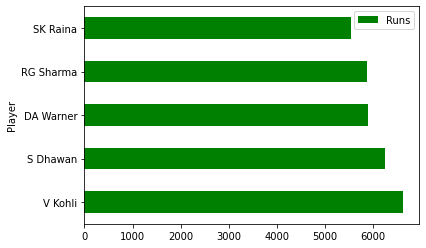

In [111]:
from matplotlib import pyplot as plt
df2_bat.head().plot(x="Player", y=['Runs'], kind="barh",color='green')


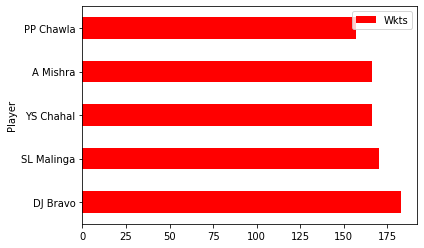

In [112]:
df2_bowl.head().plot(x="Player", y=['Wkts'], kind="barh",color='red')


In [113]:
wk_bat = pd.merge(df2_bat,df2_wk,on=["Player","Span","Mat"],right_index=False)
wk_bat

,Player,Span,Years Played_x,Mat,Inns_x,NO,Runs,HS,Ave,BF,...,4s,6s,Boundaries,Years Played_y,Inns_y,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,...,413,251,664,13,52,36,28,8,3 (3ct 0st),0.692
1,MS Dhoni,2008-2022,14,234,206,79,4978,84,39.19,3682,...,346,229,575,14,227,170,131,39,4 (4ct 0st),0.748
2,RV Uthappa,2008-2022,14,205,197,17,4952,88,27.51,3799,...,481,182,663,14,114,90,58,32,4 (2ct 2st),0.789
3,KD Karthik,2008-2022,14,229,208,45,4376,97,26.84,3299,...,426,134,560,14,212,159,125,34,4 (4ct 0st),0.750
4,AT Rayudu,2010-2022,12,188,175,31,4190,100,29.09,3296,...,349,164,513,12,20,15,13,2,3 (2ct 1st),0.750
5,KL Rahul,2013-2022,9,109,100,19,3889,132,48.01,2855,...,327,164,491,9,62,47,42,5,2 (2ct 0st),0.758
6,SV Samson,2013-2022,9,138,134,13,3526,119,29.14,2598,...,279,158,437,9,79,62,50,12,4 (2ct 2st),0.784
7,BB McCullum,2008-2018,10,109,109,5,2880,158,27.69,2186,...,293,130,423,10,18,18,12,6,4 (2ct 2st),1.000
8,PA Patel,2008-2019,11,139,137,11,2848,81,22.60,2358,...,365,49,414,11,122,81,65,16,4 (4ct 0st),0.663
9,RR Pant,2016-2022,6,98,97,15,2838,128,34.60,1918,...,260,129,389,6,88,79,61,18,3 (3ct 0st),0.897


In [114]:
wk_1=wk_bat.head().drop(['Span','Mat','Inns_x','NO','Runs','HS','BF','50','0','4s','6s','Inns_y','Dis','Ct','St'],axis=1)
wk_1

,Player,Years Played_x,Ave,SR,100,Boundaries,Years Played_y,Max Dis Inns,Dis/Inn
0,AB de Villiers,13,39.70,151.68,3,664,13,3 (3ct 0st),0.692
1,MS Dhoni,14,39.19,135.19,0,575,14,4 (4ct 0st),0.748
2,RV Uthappa,14,27.51,130.35,0,663,14,4 (2ct 2st),0.789
3,KD Karthik,14,26.84,132.64,0,560,14,4 (4ct 0st),0.750
4,AT Rayudu,12,29.09,127.12,1,513,12,3 (2ct 1st),0.750


In [115]:
wk_1['Dis/Inn'] = wk_1['Dis/Inn'].apply(lambda x: x*100)


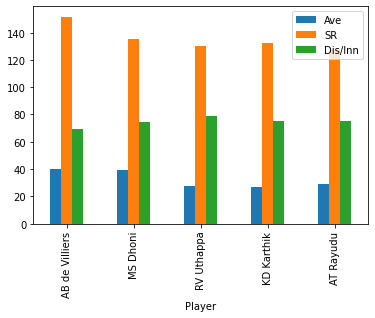

In [116]:
wk_1.plot(x="Player", y=["Ave", "SR",'Dis/Inn'], kind="bar")



In [117]:
all_rounder = pd.merge(df2_bat,df2_bowl,on=["Player","Span","Mat"],right_index=False)
all_rounder

,Player,Span,Years Played_x,Mat,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Overs,Mdns,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5
0,SR Watson,2008-2020,12,145,141,16,3874,117,30.99,2809,...,338.1,3,2682,92,4/29,29.15,7.93,22.0,1,0
1,KA Pollard,2010-2022,12,189,171,52,3412,87,28.67,2316,...,248.0,0,2180,69,4/44,31.59,8.79,21.5,1,0
2,RA Jadeja,2008-2022,14,210,161,67,2502,62,26.61,1960,...,534.1,2,4064,132,5/16,30.78,7.60,24.2,3,1
3,JH Kallis,2008-2014,6,98,96,11,2427,89,28.55,2222,...,290.2,3,2293,65,3/13,35.27,7.89,26.8,0,0
4,AD Russell,2012-2022,10,98,82,15,2035,88,30.37,1144,...,238.2,0,2179,89,5/15,24.48,9.14,16.0,2,1


In [118]:
from adjustText import adjust_text


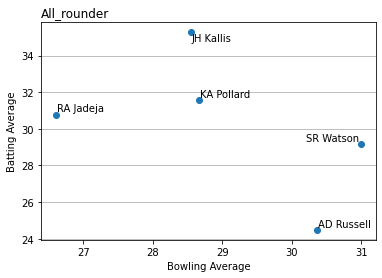

In [119]:
fig, ax = plt.subplots()

ax.scatter(all_rounder['Ave_x'],all_rounder['Ave_y'])
plt.title("All_rounder", loc = 'left')
plt.ylabel("Batting Average")
plt.xlabel("Bowling Average")
texts= [plt.text(all_rounder['Ave_x'][i],all_rounder['Ave_y'][i],all_rounder['Player'][i])for i in range(len(all_rounder))]
plt.grid(axis = 'y')
adjust_text(texts)
plt.show()

In [120]:
HS=df2_bat.nlargest(5, ['HS'])
HS

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
7,CH Gayle,2009-2021,12,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,761
20,BB McCullum,2008-2018,10,109,109,5,2880,158,27.69,2186,131.74,2,13,6,293,130,423
25,Q de Kock,2013-2022,9,92,92,6,2764,140,32.13,2064,133.91,2,19,3,277,106,383
5,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664
13,KL Rahul,2013-2022,9,109,100,19,3889,132,48.01,2855,136.21,4,31,4,327,164,491


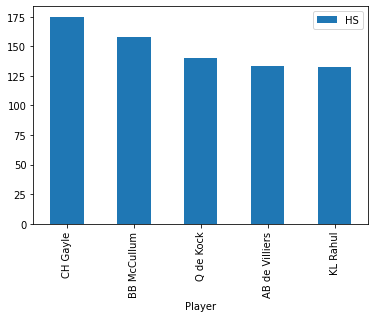

In [121]:
HS.plot(x="Player", y=["HS"], kind="bar")


In [122]:
df2_wk.head()

,Player,Span,Years Played,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,MS Dhoni,2008-2022,14,234,227,170,131,39,4 (4ct 0st),0.748
1,KD Karthik,2008-2022,14,229,212,159,125,34,4 (4ct 0st),0.750
2,WP Saha,2008-2022,14,144,123,95,73,22,4 (4ct 0st),0.772
3,RV Uthappa,2008-2022,14,205,114,90,58,32,4 (2ct 2st),0.789
4,PA Patel,2008-2019,11,139,122,81,65,16,4 (4ct 0st),0.663


In [123]:
df2_wk_plot=df2_wk.head().drop(["Years Played","Span","Mat","Inns","Dis","Dis/Inn","Max Dis Inns"],axis=1).set_index("Player",drop=True)
df2_wk_plot

,Ct,St
Player,,
MS Dhoni,131,39
KD Karthik,125,34
WP Saha,73,22
RV Uthappa,58,32
PA Patel,65,16


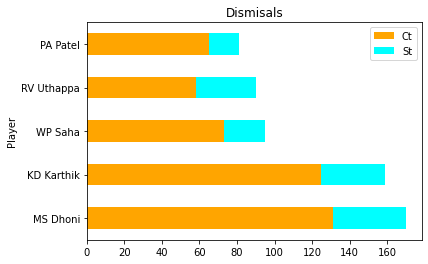

In [124]:
df2_wk_plot.plot.barh(stacked=True, title='Dismisals', color=("orange", "cyan"))


In [125]:
df2_bat.head()

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries
0,V Kohli,2008-2022,14,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218,796
1,S Dhawan,2008-2022,14,206,205,27,6244,106,35.07,4942,126.34,2,47,10,701,136,837
2,DA Warner,2009-2022,13,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216,793
3,RG Sharma,2008-2022,14,227,222,28,5879,109,30.30,4526,129.89,1,40,14,519,240,759
4,SK Raina,2008-2021,13,205,200,30,5528,100,32.51,4043,136.73,1,39,8,506,203,709


In [126]:
rpy=df2_bat['Runs']/df2_bat['Years Played']
rpy

0     473.142857
1     446.000000
2     452.384615
3     419.928571
4     425.230769
5     397.076923
6     355.571429
7     413.750000
8     353.714286
9     312.571429
10    421.700000
11    349.166667
12    291.000000
13    432.111111
14    322.833333
15    260.571429
16    391.777778
17    284.333333
18    340.300000
19    291.272727
20    288.000000
21    258.909091
22    473.000000
23    471.833333
24    396.571429
25    307.111111
26    250.000000
27    389.714286
28    264.400000
29    238.090909
30    178.714286
31    276.111111
32    275.222222
33    245.500000
34    404.500000
35    173.357143
36    265.000000
37    466.800000
38    211.545455
39    231.900000
40    363.500000
41    434.800000
42    300.142857
43    174.250000
44    413.800000
45    203.500000
46    225.444444
47    282.428571
48    280.428571
49    475.000000
dtype: float64

In [127]:
df2_bat.insert(loc=17,column='RPY',value=rpy)
df2_bat

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries,RPY
0,V Kohli,2008-2022,14,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218,796,473.142857
1,S Dhawan,2008-2022,14,206,205,27,6244,106,35.07,4942,126.34,2,47,10,701,136,837,446.000000
2,DA Warner,2009-2022,13,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216,793,452.384615
3,RG Sharma,2008-2022,14,227,222,28,5879,109,30.30,4526,129.89,1,40,14,519,240,759,419.928571
4,SK Raina,2008-2021,13,205,200,30,5528,100,32.51,4043,136.73,1,39,8,506,203,709,425.230769
5,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664,397.076923
6,MS Dhoni,2008-2022,14,234,206,79,4978,84,39.19,3682,135.19,0,24,4,346,229,575,355.571429
7,CH Gayle,2009-2021,12,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,761,413.750000
8,RV Uthappa,2008-2022,14,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182,663,353.714286
9,KD Karthik,2008-2022,14,229,208,45,4376,97,26.84,3299,132.64,0,20,13,426,134,560,312.571429


In [128]:
bpy=df2_bat["Boundaries"]/df2_bat["Years Played"]
bpy

0     56.857143
1     59.785714
2     61.000000
3     54.214286
4     54.538462
5     51.076923
6     41.071429
7     63.416667
8     47.357143
9     40.000000
10    55.100000
11    42.750000
12    36.500000
13    54.555556
14    47.083333
15    30.214286
16    48.555556
17    36.750000
18    42.300000
19    38.181818
20    42.300000
21    37.636364
22    64.833333
23    68.666667
24    48.000000
25    42.555556
26    33.272727
27    62.857143
28    36.800000
29    30.727273
30    19.428571
31    31.666667
32    38.222222
33    28.200000
34    49.833333
35    21.928571
36    40.222222
37    64.800000
38    28.818182
39    32.400000
40    50.166667
41    59.200000
42    35.000000
43    24.333333
44    66.200000
45    31.200000
46    22.777778
47    35.714286
48    36.571429
49    58.750000
dtype: float64

In [129]:
df2_bat.insert(loc=17,column='BPY',value=bpy)
df2_bat

,Player,Span,Years Played,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Boundaries,BPY,RPY
0,V Kohli,2008-2022,14,223,215,32,6624,113,36.19,5129,129.14,5,44,9,578,218,796,56.857143,473.142857
1,S Dhawan,2008-2022,14,206,205,27,6244,106,35.07,4942,126.34,2,47,10,701,136,837,59.785714,446.000000
2,DA Warner,2009-2022,13,162,162,22,5881,126,42.00,4180,140.69,4,55,9,577,216,793,61.000000,452.384615
3,RG Sharma,2008-2022,14,227,222,28,5879,109,30.30,4526,129.89,1,40,14,519,240,759,54.214286,419.928571
4,SK Raina,2008-2021,13,205,200,30,5528,100,32.51,4043,136.73,1,39,8,506,203,709,54.538462,425.230769
5,AB de Villiers,2008-2021,13,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,664,51.076923,397.076923
6,MS Dhoni,2008-2022,14,234,206,79,4978,84,39.19,3682,135.19,0,24,4,346,229,575,41.071429,355.571429
7,CH Gayle,2009-2021,12,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,761,63.416667,413.750000
8,RV Uthappa,2008-2022,14,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182,663,47.357143,353.714286
9,KD Karthik,2008-2022,14,229,208,45,4376,97,26.84,3299,132.64,0,20,13,426,134,560,40.000000,312.571429


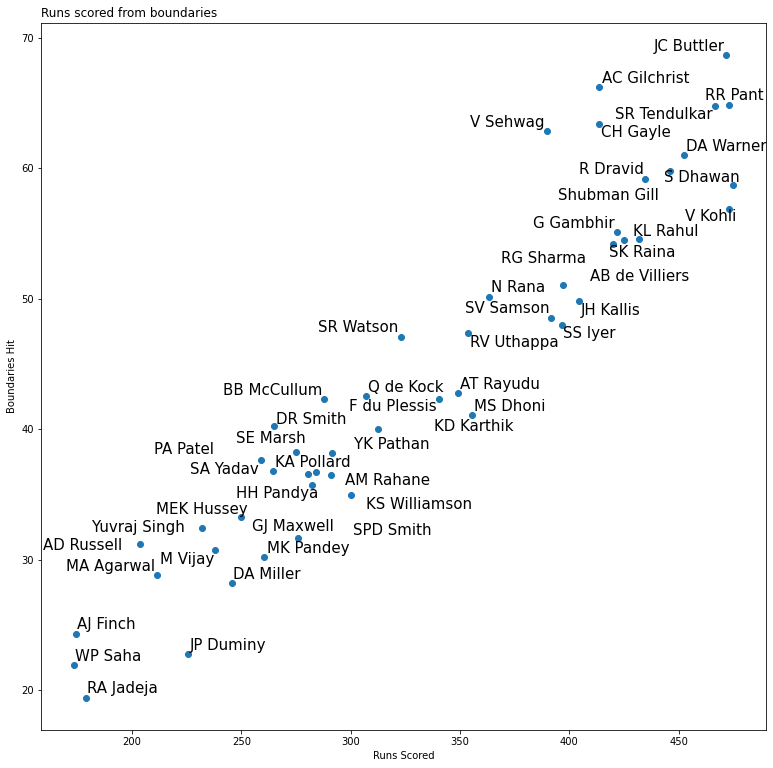

In [70]:
fig, ax = plt.subplots(figsize = (13, 13))

ax.scatter(df2_bat['RPY'],df2_bat['BPY'])
texts=[plt.text( df2_bat['RPY'][i], df2_bat['BPY'][i],df2_bat['Player'][i], size=15)for i in range(len(df2_bat))]
plt.title("Runs scored from boundaries ", loc = 'left')
plt.ylabel("Boundaries Hit")
plt.xlabel("Runs Scored")
adjust_text(texts)
fig.savefig('Bound.jpg', bbox_inches='tight', dpi=150)
plt.show()

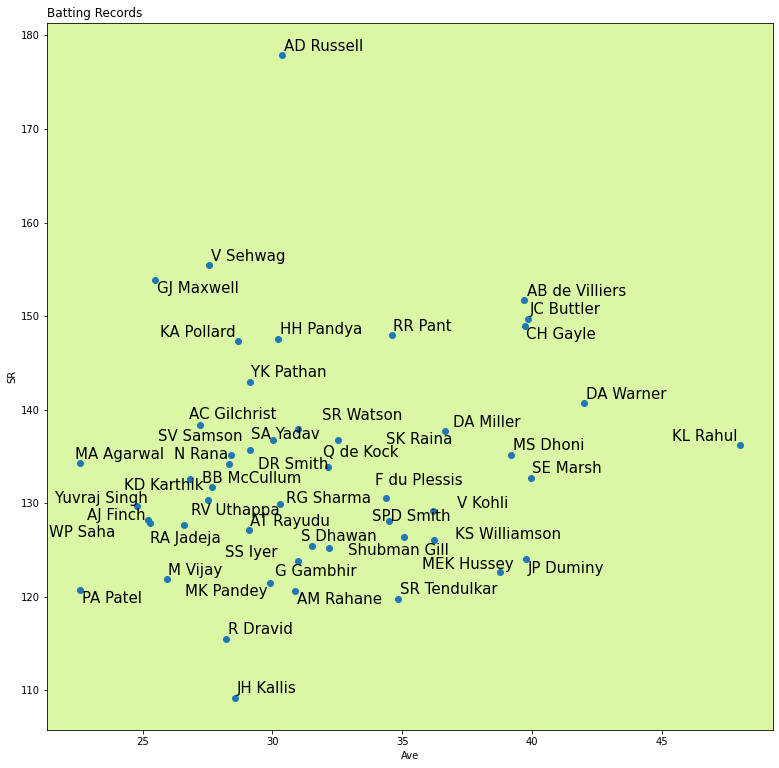

In [130]:
fig, ax = plt.subplots(figsize = (13, 13))

ax.scatter(df2_bat['Ave'],df2_bat['SR'])
texts=[plt.text( df2_bat['Ave'][i], df2_bat['SR'][i],df2_bat['Player'][i], size=15)for i in range(len(df2_bat))]
plt.title("Batting Records", loc = 'left')
plt.ylabel("SR")
plt.xlabel("Ave")
ax.set_facecolor('#DAF7A6')
adjust_text(texts)
fig.savefig('Bat.jpg', bbox_inches='tight', dpi=150)
plt.show()